# Clase 01 - Introducción

### Instrucciones para instalar Anaconda

1. Bajar e instalar la versión adecuada de Anaconda para su computador desde https://www.anaconda.com/download. Elegir las opciones por defecto durante la instalación de Anaconda.
2. Verifique la versión instalada usando
> python --version
3. Actualice Anaconda usando
> conda update --all

### Iniciar sesión de jupyter notebook o lab

1. Para iniciar una sesión de jupyter notebook debe escribir
> jupyter notebook
2. Para iniciar una sesión de jupyter lab debe escribir
> jupyter lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import math

In [3]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

### 1. Precisión de la máquina

In [4]:
def find_machine_epsilon():
    epsilon = 1.0
    while 1.0 + epsilon != 1.0:
        epsilon /= 2.0
    return epsilon * 2.0

machine_epsilon = find_machine_epsilon()
print(f"La precisión de la máquina es: {machine_epsilon}")

La precisión de la máquina es: 2.220446049250313e-16


In [5]:
def find_machine_epsilon_single_precision():
    epsilon = np.float32(1.0)
    while np.float32(1.0) + epsilon != np.float32(1.0):
        epsilon /= np.float32(2.0)
    return epsilon * np.float32(2.0)

machine_epsilon_single = find_machine_epsilon_single_precision()
print(f"La precisión de la máquina para precisión simple es: {machine_epsilon_single}")

La precisión de la máquina para precisión simple es: 1.1920928955078125e-07


In [6]:
format(math.nextafter(1., 0.), ".32f")

'0.99999999999999988897769753748435'

In [7]:
format(math.nextafter(0., 1.), ".324f")

'0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000005'

### 2. Serie de Fibonacci

Se define la serie de Fibonacci por
$$ F_0 = 1, \hspace{1cm} F_1=1 $$

$$ F_n = F_{n-1}+F_{n-2} \; \textrm{con}\; n \ge 2$$

La razón entre dos números consecutivos de la serie de Fibonacci tiende a la razón áurea
$$\lim_{n\rightarrow\infty} \frac{F_n}{F_{n-1}} = \varphi = \frac{1+\sqrt{5}}{2}= 1.6180339887\ldots$$

In [8]:
def fib(n):
    f = np.zeros(n,dtype=np.int32)
    g = np.zeros(n-1)
    f[0] = 1
    f[1] = 1
    g[0] = f[1]/f[0]
    for i in range(2,n):
        f[i] = f[i-1]+f[i-2]
        g[i-1] = f[i]/f[i-1]
    return f,g

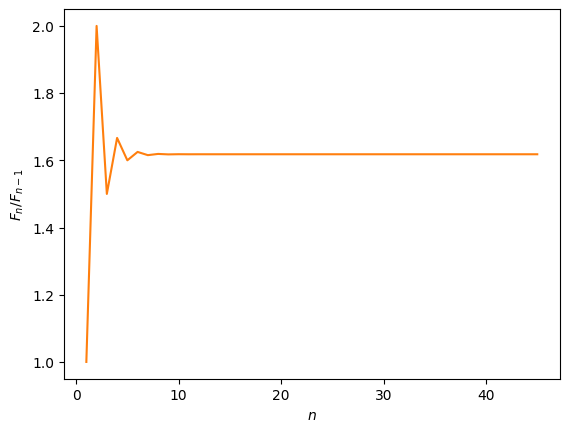

In [9]:
N = [2,46] # N = 47 genera un overflow. Por qué?
for n in N:
    f,g = fib(n)
    plt.plot(np.linspace(1,n-1,n-1),g)
    plt.xlabel('$n$')
    plt.ylabel('$F_n/F_{n-1}$') # Razón tiende a la razón aurea (1+sqrt(5))/2 = 1.61803...

In [10]:
def fibonacci_overflow():
    a, b = 0, 1
    n = 0
    while True:
        a, b = b, a + b
        print(a)
        n = n + 1
        # Simulate a fixed-width integer overflow (e.g., 32-bit signed integer)
        if a > 2**31 - 1:
            print("Overflow ocurre cuando n=",n)
            break

fibonacci_overflow()

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
Overflow ocurre cuando n= 47
